In [2]:
import pandas as pd
bdf=pd.read_csv('/content/drive/MyDrive/Gautam sir/Copy of brazil _forest_fire.csv',encoding='iso-8859-1')
bdf

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


**1. Display top 5 rows.**

In [3]:
bdf.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


**2. Display last 5 rows.**

In [4]:
bdf.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


**3. Print no. of columns and rows.**

In [5]:
r=len(bdf)
print("No. of rows :",r)
c=len(bdf.columns)
print("No. of columns :",c)

No. of rows : 6454
No. of columns : 5


**4. Get information about dataset.**

In [6]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


**5.Check for duplicate data and drop.** (bdf.duplicated().any())
newdf=df.drop_duplicates()

In [7]:
bdf.duplicated().any()

True

In [8]:
bdf=bdf.drop_duplicates()

**6. Check Null values of each columns.**

In [9]:
y=bdf['year'].isnull().sum()
print("Total no. of null in year=",y)
s=bdf['state'].isnull().sum()
print("Total no. of null in state=",s)
m=bdf['month'].isnull().sum()
print("Total no. of null in month=",m)
n=bdf['number'].isnull().sum()
print("Total no. of null in number=",n)
d=bdf['date'].isnull().sum()
print("Total no. of null in number=",d)

Total no. of null in year= 0
Total no. of null in state= 0
Total no. of null in month= 0
Total no. of null in number= 0
Total no. of null in number= 0


**7. Get over all statistics about the dataframe.**

In [10]:
bdf.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


**8. Rename Month name to English.**

In [11]:
bdf['Month']=bdf['month'].map({'Janeiro':'January','Fevereiro':'February','Marco':'March','Abril':'April','Maio':'May',
                               'Junho':'June','Julho':'July','Agosto':'August','Setembro':'September','Outubro':'October',
                               'Novembro':'November','Dezembro':'December'})

<ipython-input-11-798ac15baf73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdf['Month']=bdf['month'].map({'Janeiro':'January','Fevereiro':'February','Marco':'March','Abril':'April','Maio':'May',


In [12]:
bdf['Month']

0        January
1        January
2        January
3        January
4        January
          ...   
6449    December
6450    December
6451    December
6452    December
6453    December
Name: Month, Length: 6422, dtype: object

**9. Total no. of fires reg.**

In [13]:
s=bdf['number'].sum()
print("Total no. of fires:",s)

Total no. of fires: 698811.073


**10. In which month max no. of forest fires reported.**

In [14]:
ndf=bdf.groupby('Month')['number'].sum().sort_values(ascending=False)

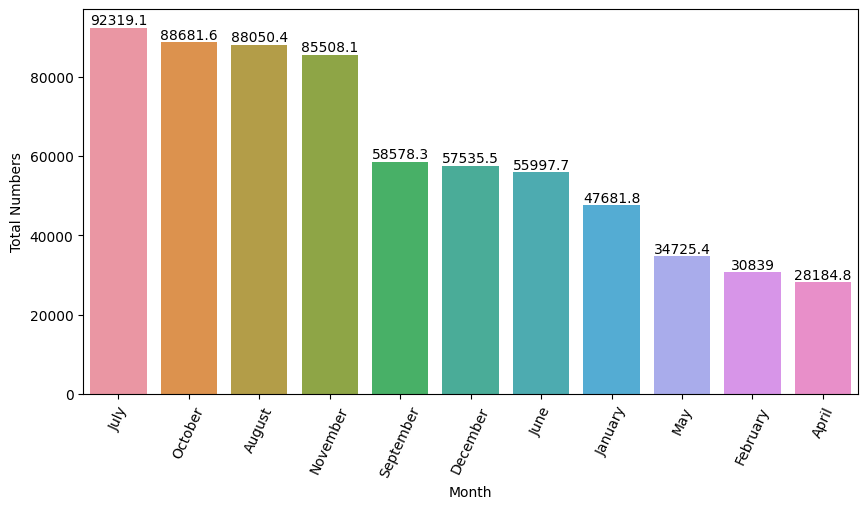

In [15]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(10,5))
lb1=sb.barplot(x=ndf.index,y=ndf.values)
plt.ylabel('Total Numbers')
plt.xticks(rotation=65)
for i in lb1.containers:
  lb1.bar_label(i)
plt.show()

**11. In which year max no. of forest fires were reported.**

In [16]:
ydf=bdf.groupby('year')['number'].sum().sort_values(ascending=False)

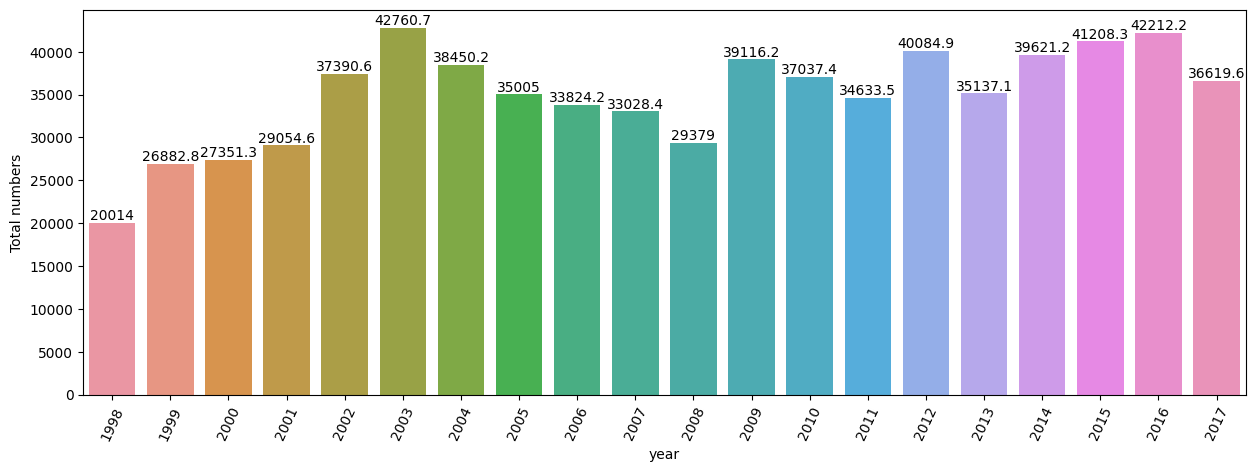

In [18]:
plt.figure(figsize=(15,5))
lb2=sb.barplot(x=ydf.index,y=ydf.values)
plt.ylabel('Total numbers')
plt.xticks(rotation=65)
for i in lb2.containers:
  lb2.bar_label(i)
plt.show()

**12. In which state max no. of forest fires were reported.**

In [19]:
sdf=bdf.groupby('state')['number'].sum().sort_values(ascending=False)

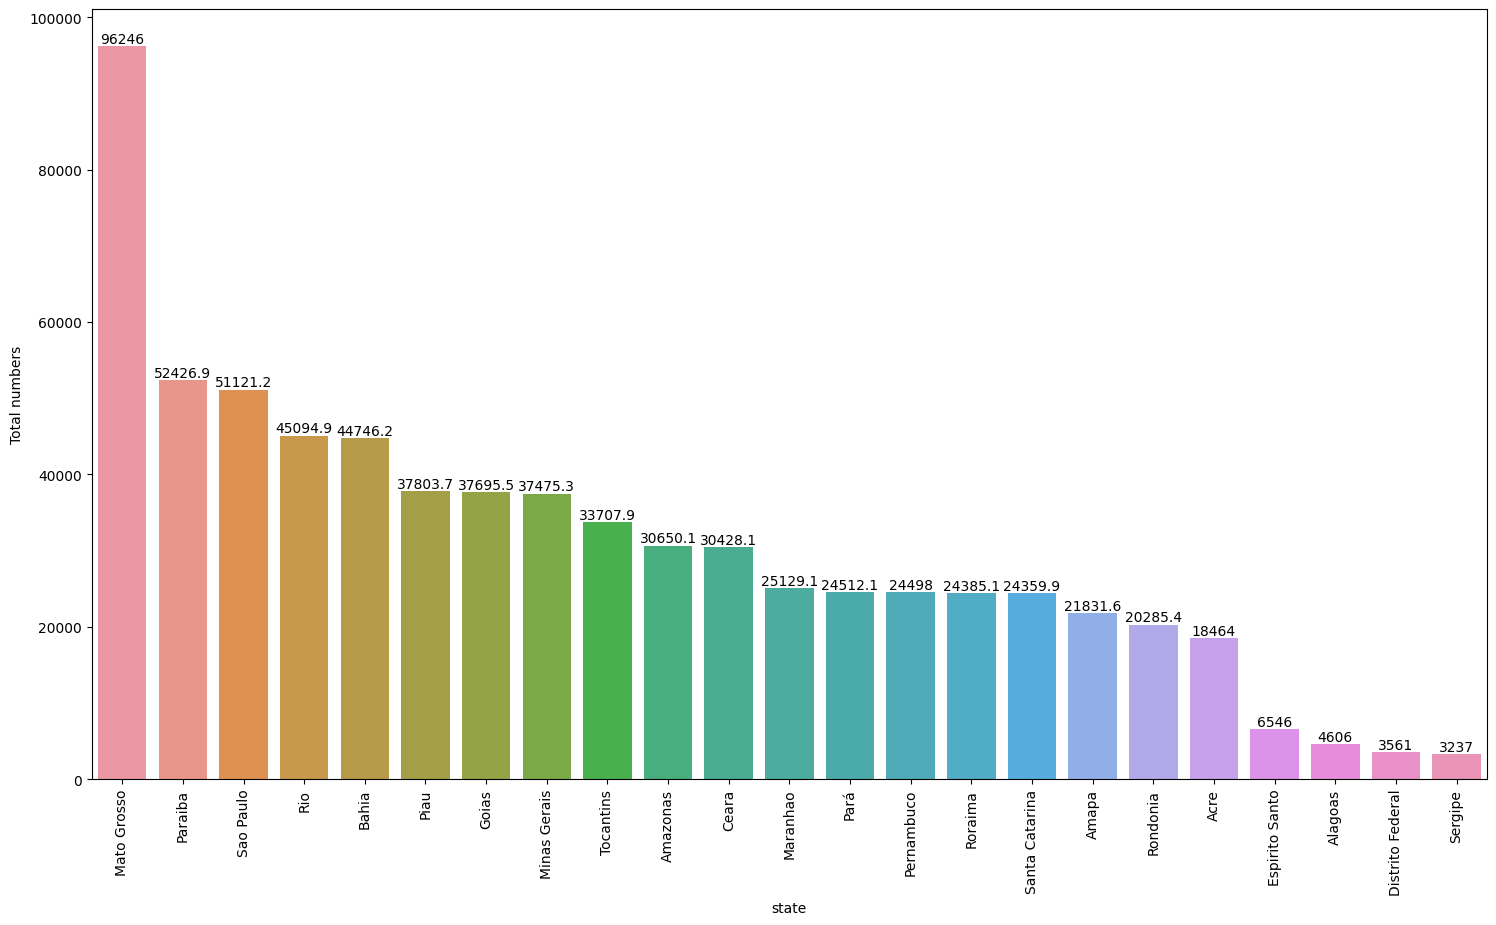

In [20]:
plt.figure(figsize=(18,10))
lb3=sb.barplot(x=sdf.index,y=sdf.values)
plt.ylabel('Total numbers')
plt.xticks(rotation='vertical')
for i in lb3.containers:
  lb3.bar_label(i)
plt.show()

**13. Find total no. of fires were reported in Amazones.**

In [21]:
a=bdf.loc[bdf['state']=='Amazonas']
sum(a['number'])

30650.129000000008

**14. Display No. of fires were reported in Amazones** **(year-wise).**

In [22]:
azdf=a.groupby('year')['number'].sum()

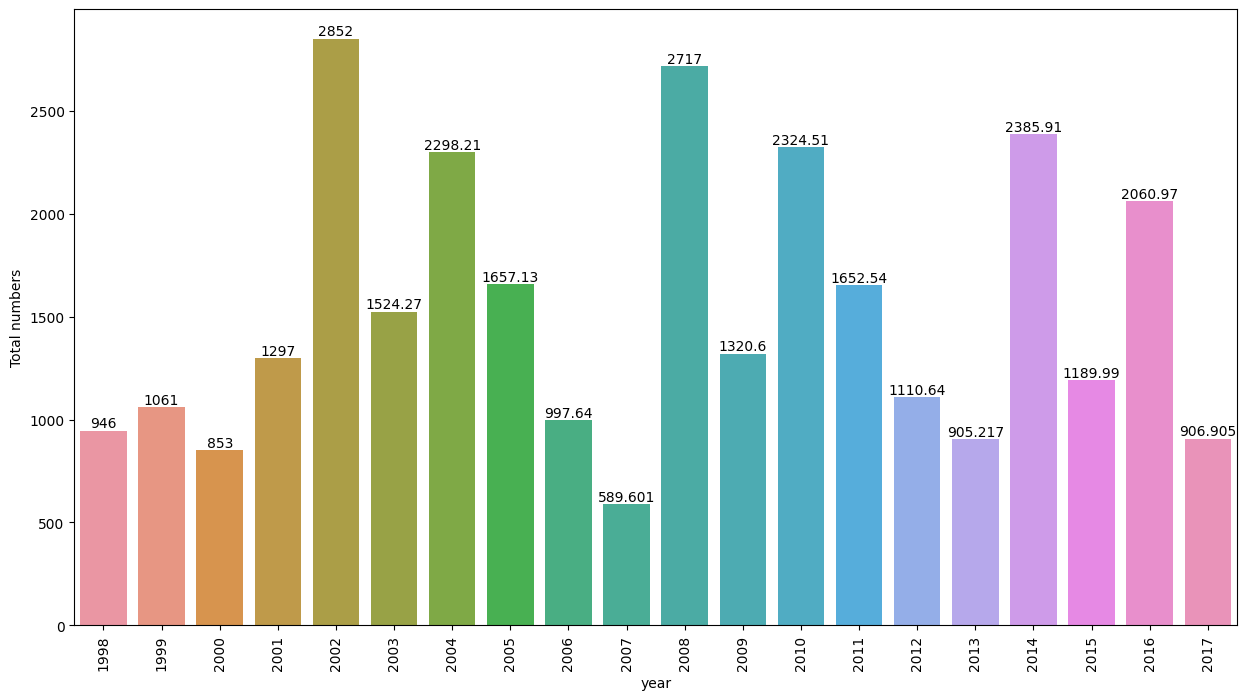

In [23]:
plt.figure(figsize=(15,8))
lb4=sb.barplot(x=azdf.index,y=azdf.values)
plt.xticks(rotation='vertical')
plt.ylabel('Total numbers')
for i in lb4.containers:
  lb4.bar_label(i)
plt.show()

**15. Display no. of fires were reported in amazones (month-wise).**

In [24]:
amdf=a.groupby('Month')['number'].sum()

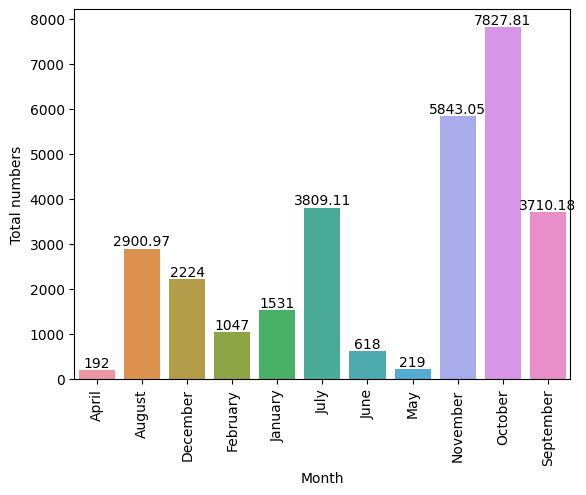

In [25]:
lb5=sb.barplot(x=amdf.index,y=amdf.values)
plt.xticks(rotation='vertical')
plt.ylabel('Total numbers')
for i in lb5.containers:
  lb5.bar_label(i)
plt.show()

**16. Find total no. of fires were reported in 2015 and visualize data based on each month.**

In [26]:
b=bdf.loc[bdf['year']=='2015']
sum(b['number'])

0

In [27]:
az1df=a.groupby('Month')['number'].sum()

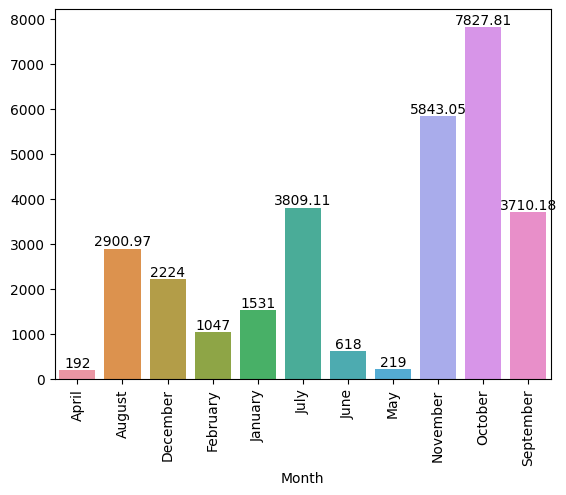

In [28]:
lb6=sb.barplot(x=az1df.index,y=az1df.values)
plt.xticks(rotation='vertical')
for i in lb6.containers:
  lb6.bar_label(i)
plt.show()

**17. Find average number of fires were reported from highest to lowest(state-wise)(visualize the data).**

In [29]:
avdf=bdf.groupby('state')['number'].mean()

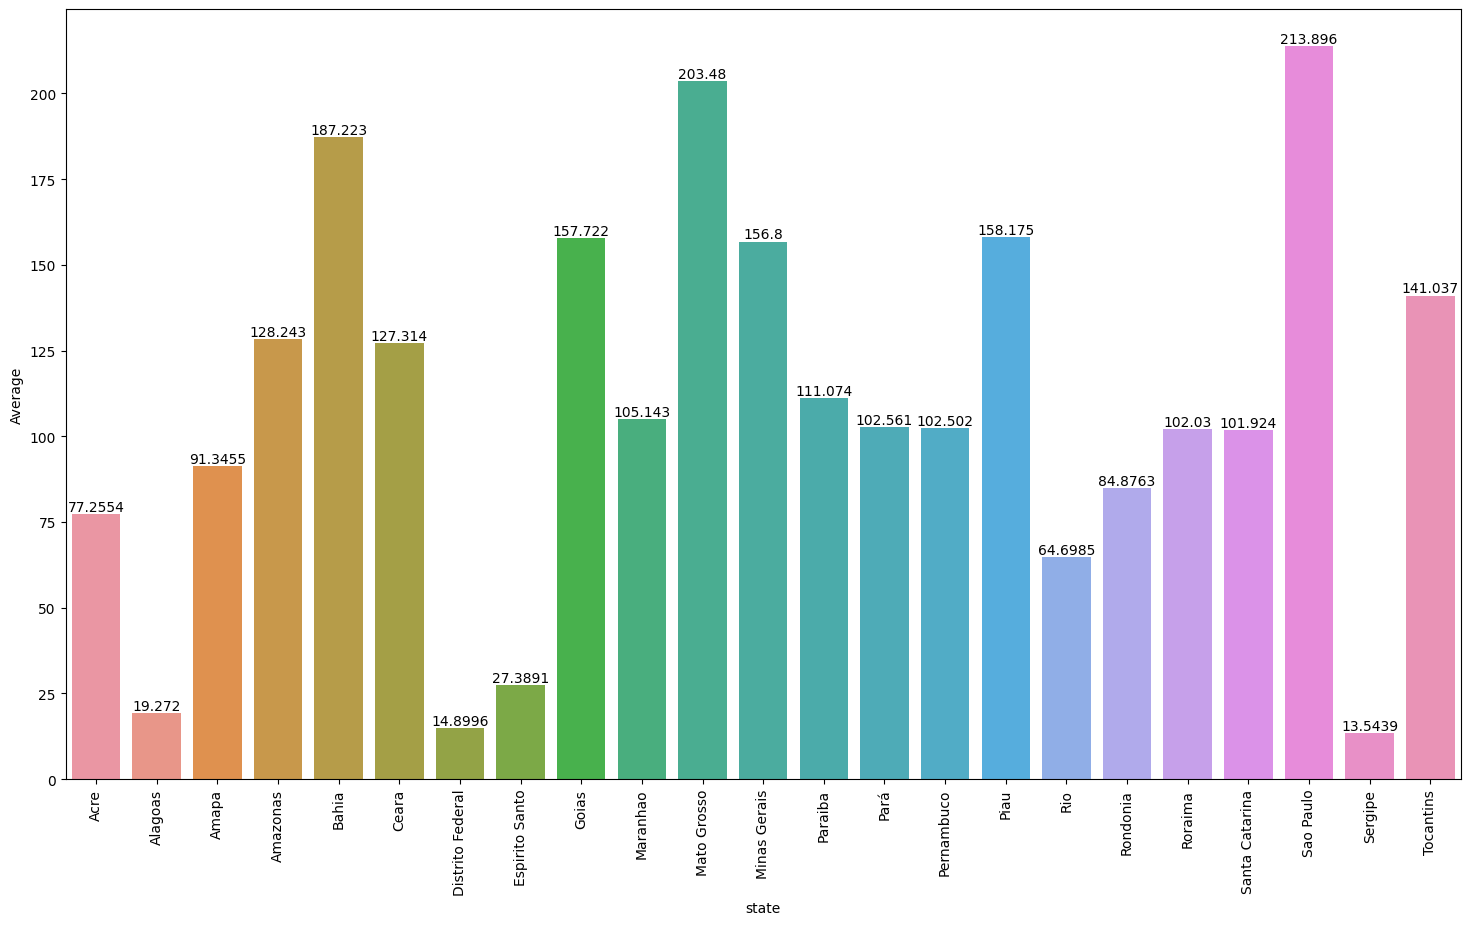

In [30]:
plt.figure(figsize=(18,10))
lb7=sb.barplot(x=avdf.index,y=avdf.values)
plt.xticks(rotation='vertical')
plt.ylabel('Average')
for i in lb7.containers:
  lb7.bar_label(i)
plt.show()

**18. To find the state names where fires were reported in 'December' month.**

In [31]:
d=bdf.loc[bdf['Month']=='December']
ddf=d.groupby('state')['number'].sum()

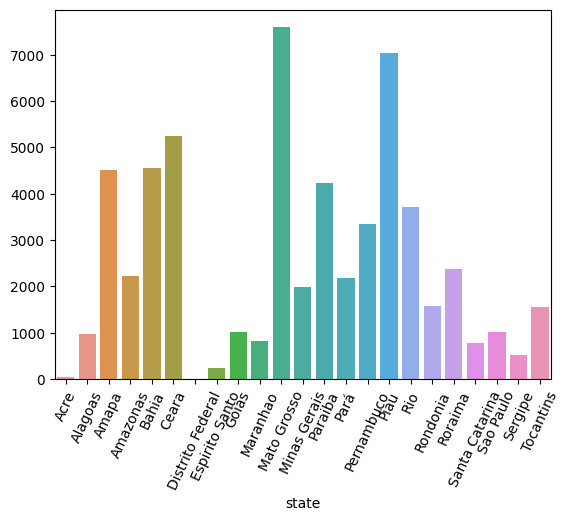

In [33]:
lb8=sb.barplot(x=ddf.index,y=ddf.values)
plt.xticks(rotation=65)
plt.show()